In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

def load_data(filepath, features, class_column):                        #loads file and removes the rows with missing values
    df = pd.read_csv(filepath)
    df_clean = df.dropna(subset=features + [class_column])
    return df_clean

def get_class_data(df, class_column, class_value, features):            #returns the numeric feature values
    return df[df[class_column] == class_value][features].values

def compute_centroid(data):                                             #mean calculation
    return np.mean(data, axis=0)

def compute_spread(data):                                               #Standard deviation calculation
    return np.std(data, axis=0)

def compute_interclass_distance(centroid1, centroid2):                  #Euclidean distance 
    return np.linalg.norm(centroid1 - centroid2)

def analyze_classes(df, class_column, class1, class2, features):        #Calls compute_centroid,compute_spread,compute_interclass_distance func
    class1_data = get_class_data(df, class_column, class1, features)
    class2_data = get_class_data(df, class_column, class2, features)
    
    centroid1 = compute_centroid(class1_data)
    centroid2 = compute_centroid(class2_data)
    
    spread1 = compute_spread(class1_data)
    spread2 = compute_spread(class2_data)
    
    distance = compute_interclass_distance(centroid1, centroid2)
    
    return centroid1, spread1, centroid2, spread2, distance

def analyze_feature_distribution(df, feature_name, bins=30):
    data = df[feature_name].dropna().values  
    hist_data, bin_edges = np.histogram(data, bins=bins)
    plt.figure(figsize=(8, 5))                                            # Plot the histogram
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    mean_val = np.mean(data)                                              # Calculate mean and variance
    var_val = np.var(data)
    hist_data, bin_edges = np.histogram(data, bins=bins)

    return mean_val, var_val, hist_data, bin_edges

def minkowski_distance_range(vec1, vec2, r_range=range(1, 11)):           #Minkowski distances
    distances = []
    for r in r_range:
        dist = distance.minkowski(vec1, vec2, p=r)
        distances.append(dist)
    return distances

def plot_minkowski_distances(r_values, distances, feature_labels):        #Plot Minkowski distances
    plt.figure(figsize=(8, 5))
    plt.plot(r_values, distances, marker='o', linestyle='-', color='purple')
    plt.title(f"Minkowski Distance between two feature vectors: {feature_labels}")
    plt.xlabel("r (order)")
    plt.ylabel("Minkowski Distance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def prepare_train_test_split(df, features, class_column, class1, class2, test_size=0.3):        #split the dataset to train and test data
    df_binary = df[df[class_column].isin([class1, class2])]
    X = df_binary[features].dropna().values
    y = df_binary[class_column].loc[df_binary[features].dropna().index].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

def train_knn_classifier(X_train, y_train, k=3):                           #Knn classification
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

def evaluate_model(model, X_test, y_test):                                #accuracy
    accuracy = model.score(X_test, y_test)
    return accuracy

def knn_accuracy_vs_k(X_train, X_test, y_train, y_test, k_range):         #accuracy for different k values
    accuracies = []
    for k in k_range:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        accuracies.append(acc)
    return accuracies



In [4]:
#A1

# Configuration
file_path = r"C:\Users\dhruv\OneDrive\Desktop\ml\listings.csv"
features = ['latitude', 'longitude', 'price', 'availability_365']
class_column = 'room_type'
class_1 = 'Entire home/apt'
class_2 = 'Private room'

# Load and analyze
df = load_data(file_path, features, class_column)
centroid1, spread1, centroid2, spread2, interclass_distance = analyze_classes(df, class_column, class_1, class_2, features)

# Display results
print(f"Centroid of {class_1}: {centroid1}")
print(f"Spread of {class_1}: {spread1}")
print(f"Centroid of {class_2}: {centroid2}")
print(f"Spread of {class_2}: {spread2}")
print(f"Interclass Euclidean distance: {interclass_distance}")


Centroid of Entire home/apt: [ 40.7282748  -73.95328265 306.33840645 247.6965085 ]
Spread of Entire home/apt: [5.50730661e-02 5.78658313e-02 8.19746395e+02 1.02972255e+02]
Centroid of Private room: [ 40.72666519 -73.93158065 167.7786095  240.85244414]
Spread of Private room: [6.48740127e-02 6.20443613e-02 1.14090872e+03 1.12147180e+02]
Interclass Euclidean distance: 138.7287245635644


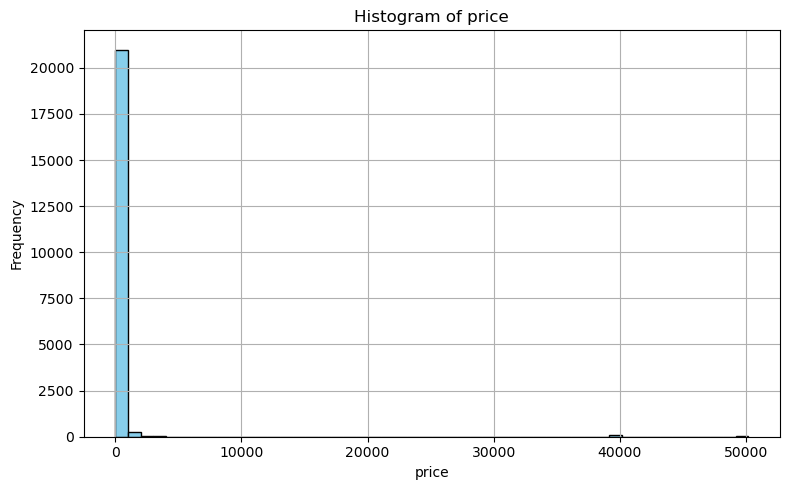

Mean of 'price': 521.5283564005779
Variance of 'price': 12259124.216668768
Histogram bin counts: [20982   236    46    23     8     1     1     2     3     3     0     0
     0     0     0     0     1     0     0     6     1     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0   114     0     0     0     0     0     0     0     0
     0    32]
Histogram bin edges: [8.000000e+00 1.011520e+03 2.015040e+03 3.018560e+03 4.022080e+03
 5.025600e+03 6.029120e+03 7.032640e+03 8.036160e+03 9.039680e+03
 1.004320e+04 1.104672e+04 1.205024e+04 1.305376e+04 1.405728e+04
 1.506080e+04 1.606432e+04 1.706784e+04 1.807136e+04 1.907488e+04
 2.007840e+04 2.108192e+04 2.208544e+04 2.308896e+04 2.409248e+04
 2.509600e+04 2.609952e+04 2.710304e+04 2.810656e+04 2.911008e+04
 3.011360e+04 3.111712e+04 3.212064e+04 3.312416e+04 3.412768e+04
 3.513120e+04 3.613472e+04 3.713824e+04 3.814176e+04 3.914528e+04
 4.014880e+04 4.115232e+04 4.215584e+04 4.315936

In [6]:
#A2

# Analyze and retrieve results
mean_price, var_price, hist_counts, bin_edges = analyze_feature_distribution(df, 'price', bins=50)

# Display outside the function
print(f"Mean of 'price': {mean_price}")
print(f"Variance of 'price': {var_price}")
print(f"Histogram bin counts: {hist_counts}")
print(f"Histogram bin edges: {bin_edges}")

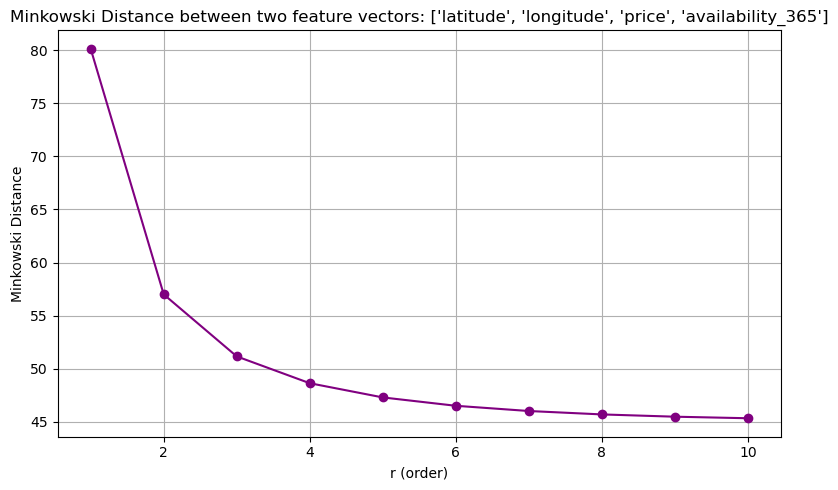

In [8]:
#A3

vec1 = df[features].dropna().iloc[0].values
vec2 = df[features].dropna().iloc[1].values
r_values = list(range(1, 11))
minkowski_distances = minkowski_distance_range(vec1, vec2, r_values)
plot_minkowski_distances(r_values, minkowski_distances, features)

In [11]:
#A4

X_train, X_test, y_train, y_test = prepare_train_test_split(
    df, features, class_column, class_1, class_2, test_size=0.3
)

In [13]:
#A5

knn_model = train_knn_classifier(X_train, y_train, k=3)

In [15]:
#A6

knn_accuracy = evaluate_model(knn_model, X_test, y_test)
print(f"Accuracy of kNN classifier on test set: {knn_accuracy:.2f}")

Accuracy of kNN classifier on test set: 0.75


In [16]:
#A7

# Predict all test vectors
y_pred = knn_model.predict(X_test)

# Predict a single test vector (e.g., first one)
test_vect = X_test[0].reshape(1, -1)
predicted_class = knn_model.predict(test_vect)
actual_class = y_test[0]

print(f"Predicted class: {predicted_class[0]}")
print(f"Actual class: {actual_class}")

Predicted class: Private room
Actual class: Private room


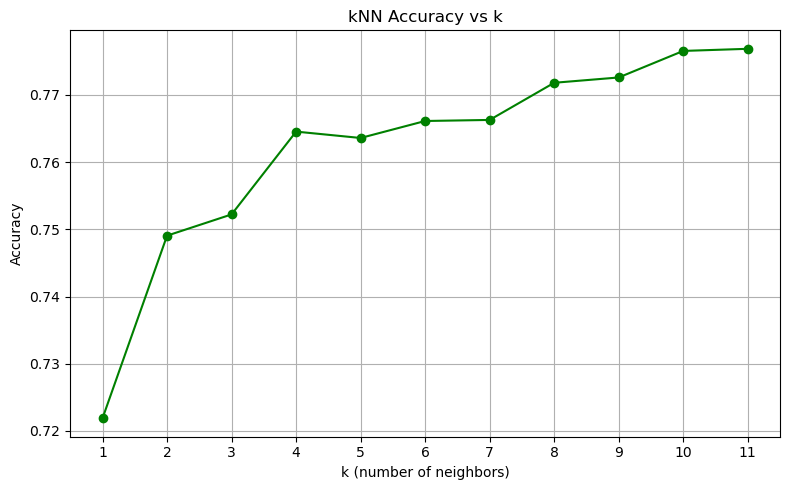

In [19]:
#A8

k_values = list(range(1, 12))
accuracies = knn_accuracy_vs_k(X_train, X_test, y_train, y_test, k_values)
# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='green')
plt.title("kNN Accuracy vs k")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()
